In [1]:
%%time
import pandas as pd

#df = pd.read_csv(r'C:\Users\medkh\Desktop\aftertest.xlsx',low_memory=False)

df = pd.read_excel(r'C:\Users\medkh\Desktop\aftertest.xlsx')

Wall time: 4min 37s


In [2]:
credit_df=df
# Shuffle the Dataset.
shuffled_df = credit_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['failure'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['failure'] == 0].sample(n=920,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])
normalized_df
normalized_df = normalized_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [3]:
dt=normalized_df
dt.fillna(0,inplace=True)

In [4]:
#dt.fillna(dt.mean(),inplace=True)

In [5]:
df.shape

(258275, 79)

In [6]:
df['failure'].value_counts()

0.0    249523
1.0       920
Name: failure, dtype: int64

In [7]:
dt.shape

(1840, 79)

In [8]:
dt['failure'].value_counts()

1.0    920
0.0    920
Name: failure, dtype: int64

In [9]:
dt

,Unnamed: 0,type,datetime,tip,mlid,mw_connection_no,site_no,site_id,neid,direction,...,wind_dir,wind_speed,wind_dir_max,wind_speed_max,humidity,precipitation,precipitation_coeff,pressure,pressure_sea_level,failure
0,222889,NEC,2019-11-04,NEAR,K7MG,1344505,79035,RL_L?D?M,0.0,0,...,0.0,0.0,0.0,0.0,100.0,0.0,60.0,0.0,0.0,1.0
1,76227,ENK,2019-05-26,NEAR,K7NO,354524,23289,RL_S7ZP>,9326.0,Near End,...,0.0,0.0,180.0,1.0,73.0,0.0,60.0,1008.5,1015.0,0.0
2,55251,ENK,2019-04-15,FAR,K7GD,318675,12631,RL_V7ISO,7390.0,Near End,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,110271,ENK,2019-07-07,FAR,K7AJ,306647,99127,RL_IASMP,0.0,0,...,8.0,0.5,65.0,2.8,56.0,0.0,60.0,1004.3,1007.1,1.0
4,12741,ENK,2019-01-25,NEAR,K7NV,163293,1332,RL_SKQ?J,0.0,0,...,9.0,1.1,196.0,2.4,98.0,0.0,60.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,121602,ENK,2019-07-17,FAR,K7KR,336455,23289,RL_S7ZP>,9326.0,Near End,...,10.0,1.0,234.0,1.6,65.0,0.0,60.0,995.6,1001.9,1.0
1836,152166,NEC,2019-08-27,NEAR,K7CM,316456,77064,RL_KMTMM,0.0,0,...,8.0,0.5,174.0,2.9,75.0,0.0,60.0,1007.1,1009.9,0.0
1837,111486,ENK,2019-07-08,FAR,K7QF,357081,2625,RL_]CVPI,7386.0,Near End,...,7.0,0.5,96.0,1.6,55.0,0.0,60.0,999.2,1005.5,0.0
1838,12106,ENK,2019-01-24,FAR,K7SB,336925,40658,RL_L?E?H,9100.0,Near End,...,4.0,6.1,65.0,11.1,91.0,0.0,60.0,996.6,1002.5,1.0


In [10]:
import category_encoders as ce
ts=dt
j=ts.select_dtypes(include=["object"])
encoder=ce.TargetEncoder(cols=j) 
j1=encoder.fit_transform(j,ts['failure'])
j2=ts.select_dtypes(include=["number"])
result = pd.concat([j1, j2], axis=1, join='inner')
result

,type,tip,mlid,site_id,direction,polarization,card_type,adaptive_modulation,freq_band,station_no,...,wind_dir,wind_speed,wind_dir_max,wind_speed_max,humidity,precipitation,precipitation_coeff,pressure,pressure_sea_level,failure
0,0.514837,0.474157,0.996654,0.923074,0.529880,0.497895,0.514837,0.475410,0.570681,0.677419,...,0.0,0.0,0.0,0.0,100.0,0.0,60.0,0.0,0.0,1.0
1,0.491424,0.474157,0.571252,0.347826,0.464115,0.497895,0.449393,0.475410,0.565868,0.414414,...,0.0,0.0,180.0,1.0,73.0,0.0,60.0,1008.5,1015.0,0.0
2,0.491424,0.524211,0.999999,0.823529,0.464115,0.497895,0.660870,0.475410,0.565868,0.588235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.491424,0.524211,0.942857,0.866667,0.529880,0.497895,0.660870,0.818182,0.565868,0.586207,...,8.0,0.5,65.0,2.8,56.0,0.0,60.0,1004.3,1007.1,1.0
4,0.491424,0.474157,0.794604,0.842105,0.529880,0.497895,0.449393,0.475410,0.565868,0.714286,...,9.0,1.1,196.0,2.4,98.0,0.0,60.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,0.491424,0.524211,0.500000,0.347826,0.464115,0.497895,0.449393,0.475410,0.417671,0.414414,...,10.0,1.0,234.0,1.6,65.0,0.0,60.0,995.6,1001.9,1.0
1836,0.514837,0.474157,0.624886,0.624886,0.529880,0.497895,0.514837,0.475410,0.565868,0.586207,...,8.0,0.5,174.0,2.9,75.0,0.0,60.0,1007.1,1009.9,0.0
1837,0.491424,0.524211,0.334449,0.286244,0.464115,0.497895,0.450581,0.475410,0.417671,0.414414,...,7.0,0.5,96.0,1.6,55.0,0.0,60.0,999.2,1005.5,0.0
1838,0.491424,0.524211,0.899951,0.688525,0.464115,0.497895,0.450581,0.475410,0.565868,0.555556,...,4.0,6.1,65.0,11.1,91.0,0.0,60.0,996.6,1002.5,1.0


In [11]:
result[['type','tip','mlid']]

,type,tip,mlid
0,0.514837,0.474157,0.996654
1,0.491424,0.474157,0.571252
2,0.491424,0.524211,0.999999
3,0.491424,0.524211,0.942857
4,0.491424,0.474157,0.794604
...,...,...,...
1835,0.491424,0.524211,0.500000
1836,0.514837,0.474157,0.624886
1837,0.491424,0.524211,0.334449
1838,0.491424,0.524211,0.899951


In [12]:
dt[['type','tip','mlid']]

,type,tip,mlid
0,NEC,NEAR,K7MG
1,ENK,NEAR,K7NO
2,ENK,FAR,K7GD
3,ENK,FAR,K7AJ
4,ENK,NEAR,K7NV
...,...,...,...
1835,ENK,FAR,K7KR
1836,NEC,NEAR,K7CM
1837,ENK,FAR,K7QF
1838,ENK,FAR,K7SB


In [13]:
#r = te_df.profile_report(samples=None,
#    correlations=None,
#    missing_diagrams=None,
#    duplicates=None,)
#r.to_file(output_file='output12interactions.html')

In [14]:
#del te_df["Unnamed: 0"]
#del te_df["datetime"]

In [15]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [17]:
from sklearn.feature_selection import VarianceThreshold
X=result.iloc[:,:-1]
y=result.iloc[:,-1]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
XX=sel.fit_transform(X)

In [18]:
result.shape

(1840, 78)

In [19]:
XX.shape

(1840, 57)

In [20]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

c:\Users\medkh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


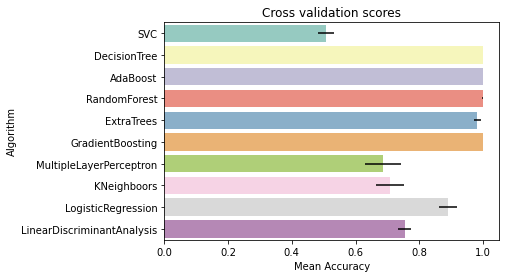

In [21]:
# Modeling step Test differents algorithms 
#dataframe=te_df
#array = dataframe.values
#X_train = array[:,0:-1]
#Y_train = array[:,-1]
X_train = XX
Y_train = y
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [22]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.9858695652173912

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
X = result.iloc[:,:-1]
y = result.iloc[:,-1]
cols = list(X.columns)
model = ExtraTreesClassifier()
#Initializing RFE model
rfe = RFE(model,n_features_to_select=30)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['mlid', 'site_id', 'card_type', 'adaptive_modulation', 'freq_band',
       'station_no', 'weather_day1', 'weather_day2', 'weather_day3',
       'weather_day4', 'weather_day5', 'Unnamed: 0', 'severaly_error_second',
       'error_second', 'unavail_second', 'avail_time', 'bbe', 'capacity',
       'humidity_max_day1', 'humidity_min_day1', 'wind_dir_day1',
       'humidity_max_day2', 'humidity_min_day2', 'humidity_max_day3', 'temp',
       'temp_max', 'temp_min', 'wind_dir_max', 'wind_speed_max', 'humidity'],
      dtype='object')


In [24]:
et=result[['site_id','card_type', 'adaptive_modulation', 'weather_day1','weather_day2','failure']]

In [40]:
a = et.iloc[:,:-1]
b = et.iloc[:,-1]
a

,site_id,card_type,adaptive_modulation,weather_day1,weather_day2
0,0.923074,0.514837,0.475410,0.456973,0.433642
1,0.347826,0.449393,0.475410,0.456973,0.433642
2,0.823529,0.660870,0.475410,0.456973,0.433642
3,0.866667,0.660870,0.818182,0.429603,0.365672
4,0.842105,0.449393,0.475410,0.456973,0.433642
...,...,...,...,...,...
1835,0.347826,0.449393,0.475410,0.148387,0.168919
1836,0.624886,0.514837,0.475410,0.429603,0.365672
1837,0.286244,0.450581,0.475410,0.148387,0.168919
1838,0.688525,0.450581,0.475410,0.456973,0.433642


In [26]:
#ExtraTrees 

ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(a,b)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


c:\Users\medkh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\medkh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\medkh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\medkh\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\medkh\anaconda3\lib\site-packages

0.8293478260869567

In [50]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

ImportError: cannot import name 'json' from 'itsdangerous' (c:\Users\medkh\anaconda3\lib\site-packages\itsdangerous\__init__.py)

In [49]:
#explainer = ClassifierExplainer(clf_DecisionTreeClassifier,test_features, test_labels)
explainer = ClassifierExplainer(ExtC_best, a, b,  cats= a.columns, labels=['0','1'])

ExplainerDashboard(explainer).run()

NameError: name 'ClassifierExplainer' is not defined

In [47]:
!pip install explainerdashboard

In [27]:
#Save model
import pickle
pickle.dump(ExtC_best, open('model2.pkl', 'wb'))

In [28]:
et1=dt[['site_id','card_type', 'adaptive_modulation', 'weather_day1','weather_day2','failure']]

In [29]:
et1

,site_id,card_type,adaptive_modulation,weather_day1,weather_day2,failure
0,RL_L?D?M,cardtype5,Enable,0,0,1.0
1,RL_S7ZP>,cardtype1,Enable,0,0,0.0
2,RL_V7ISO,cardtype2,Enable,0,0,1.0
3,RL_IASMP,cardtype2,Disable,few clouds,few clouds,1.0
4,RL_SKQ?J,cardtype1,Enable,0,0,1.0
...,...,...,...,...,...,...
1835,RL_S7ZP>,cardtype1,Enable,hot day,hot day,1.0
1836,RL_KMTMM,cardtype5,Enable,few clouds,few clouds,0.0
1837,RL_]CVPI,cardtype4,Enable,hot day,hot day,0.0
1838,RL_L?E?H,cardtype4,Enable,0,0,1.0


In [30]:
encoder=ce.TargetEncoder(cols=et1) 
nu=encoder.fit_transform(et1,et1['failure'])

In [31]:
nu

,site_id,card_type,adaptive_modulation,weather_day1,weather_day2,failure
0,0.923074,0.514837,0.475410,0.456973,0.433642,1.0
1,0.347826,0.449393,0.475410,0.456973,0.433642,0.0
2,0.823529,0.660870,0.475410,0.456973,0.433642,1.0
3,0.866667,0.660870,0.818182,0.429603,0.365672,1.0
4,0.842105,0.449393,0.475410,0.456973,0.433642,1.0
...,...,...,...,...,...,...
1835,0.347826,0.449393,0.475410,0.148387,0.168919,1.0
1836,0.624886,0.514837,0.475410,0.429603,0.365672,0.0
1837,0.286244,0.450581,0.475410,0.148387,0.168919,0.0
1838,0.688525,0.450581,0.475410,0.456973,0.433642,1.0


In [32]:
nu.to_excel (r'export_dataframe.xlsx')


In [33]:
nu['weather_day1'].nunique()

13

In [37]:
nu.drop_duplicates(keep=False,inplace=True)


In [38]:
nu

,site_id,card_type,adaptive_modulation,weather_day1,weather_day2,failure
10,0.352941,0.514837,0.47541,0.147059,0.151515,0.0
20,0.636364,0.514837,0.47541,0.719626,1.000000,1.0
21,0.607143,0.514837,0.47541,0.489130,0.666667,0.0
27,0.003346,0.514837,0.47541,0.148387,0.168919,0.0
37,0.761905,0.514837,0.47541,0.456973,0.433642,0.0
...,...,...,...,...,...,...
1823,0.775862,0.514837,0.47541,0.661818,0.059601,0.0
1824,0.263158,0.514837,0.47541,0.148387,0.365672,0.0
1831,0.646800,0.450581,0.47541,0.429603,0.365672,0.0
1837,0.286244,0.450581,0.47541,0.148387,0.168919,0.0


In [40]:
nu.drop_duplicates(subset =['site_id','card_type','adaptive_modulation','weather_day1','weather_day2','failure'],
                     keep = False, inplace = True)

In [42]:
nu = nu.drop_duplicates(subset=['site_id','card_type','adaptive_modulation','weather_day1','weather_day2','failure'], keep='first')

In [43]:
nu

,site_id,card_type,adaptive_modulation,weather_day1,weather_day2,failure
10,0.352941,0.514837,0.47541,0.147059,0.151515,0.0
20,0.636364,0.514837,0.47541,0.719626,1.000000,1.0
21,0.607143,0.514837,0.47541,0.489130,0.666667,0.0
27,0.003346,0.514837,0.47541,0.148387,0.168919,0.0
37,0.761905,0.514837,0.47541,0.456973,0.433642,0.0
...,...,...,...,...,...,...
1823,0.775862,0.514837,0.47541,0.661818,0.059601,0.0
1824,0.263158,0.514837,0.47541,0.148387,0.365672,0.0
1831,0.646800,0.450581,0.47541,0.429603,0.365672,0.0
1837,0.286244,0.450581,0.47541,0.148387,0.168919,0.0
